In [1]:
!pip install tensorflow
!pip install keras

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [4]:
# printing version

print("TensorFlow version:" , tf.__version__)
print("Keras version:" , keras.)

TensorFlow version: 2.15.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [5]:
wine_qaulity_df = pd.read_csv('wine.csv')

In [6]:
wine_qaulity_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [56]:
# exploring the dimensions

print('Wine dataset dimension:' , wine_qaulity_df.shape)

Wine dataset dimension: (1599, 12)


In [57]:
# check for null values

print('Null values:\n\n',wine_qaulity_df.isnull().sum())

# Identify categorical variable

categorical_vars = wine_qaulity_df.select_dtypes(include = ['object']).columns

print('\nCategorical variable:',categorical_vars)

Null values:

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Categorical variable: Index(['quality'], dtype='object')


In [58]:
# saparating target variable and independent variable

In [78]:
X = wine_qaulity_df.drop(columns = ['quality'])
y = wine_qaulity_df['quality']

In [79]:


# Define mapping for binary encoding
binary_mapping = {"bad": 0, "good": 1}

# Convert binary strings to binary values
y = [binary_mapping[label] for label in y]


In [80]:
# prompt: convert above variable y that is list type to dataframe columns name should be 'qaulity'

import pandas as pd
y = pd.DataFrame({'quality': y})


In [81]:
y

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [82]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 37)

In [83]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [84]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [85]:
model_clf.layers

In [86]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Define TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs')


In [88]:
# Define Early Stopping callback
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)


In [89]:
# Define ModelCheckpoint callback
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)


In [90]:
# Compile the model with categorical cross-entropy loss
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [91]:
# Fit the model with callbacks
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, callbacks=[tensorboard_callback,
                                                      early_stopping_callback,
                                                      model_checkpoint_callback])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


 1/28 [>.............................] - ETA: 15s - loss: 0.0000e+00 - accuracy: 0.4062
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.h5
28/28 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4771 - val_loss: 0.0000e+00 - val_accuracy: 0.4688
Epoch 2/20
 1/28 [>.............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4062
Epoch 2: val_loss did not improve from 0.00000
28/28 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4749 - val_loss: 0.0000e+00 - val_accuracy: 0.4688
Epoch 3/20
 1/28 [>.............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 0.00000
28/28 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4749 - val_loss: 0.0000e+00 - val_accuracy: 0.4688
Epoch 4/20
 1/28 [>.............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 4: val_loss did not improve from 0.00000
28/28 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4749 - val_loss: 0.0000e+00 - val_accuracy: 0.4688
Epoch 4: early stopping


In [92]:
# Get the model's parameters
model_params = model.get_weights()


In [93]:
history

In [94]:
import pandas as pd

# Store training history as DataFrame
history_df = pd.DataFrame(history.history)


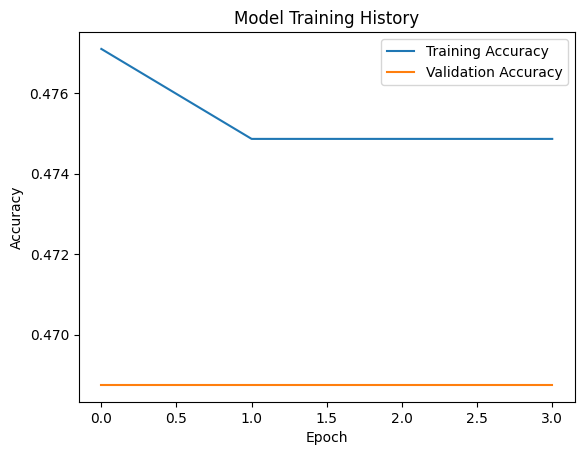

In [95]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training History')
plt.legend()
plt.show()


In [96]:
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4458
Test Loss: 0.0
Test Accuracy: 0.44583332538604736
